#Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
myDirFiles = "/content/drive/MyDrive/Pandas"
os.chdir(myDirFiles)

Mounted at /content/drive


#Pre-Processing Data

##Import Library

In [ ]:
#Base
import pandas as pd #Untuk mengolah dataset
import numpy as np #Untuk menghitung algoritma atau rumus

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Disable Warnings
import warnings
warnings.filterwarnings("ignore")

#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

#Train-Test Split
from sklearn.model_selection import train_test_split

#Cross Validation Untuk menangani Imbalanced data
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

#Grid Search Untuk mencari hyperparameter terbaik
from sklearn.model_selection import GridSearchCV

#Save Model
import pickle
import requests
import json

In [ ]:
#Import Dataset
df = pd.read_csv('diabetes.csv')

In [ ]:
#Menampilkan Dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##Check Missing Value

Hal pertama yang harus dilakukan adalah mengecek missing value

In [ ]:
#Check Missing Values Dan Tipe data yang tidak sama
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Ternyata tidak ada missing value, namun tipe datanya masih belum sama

##Format Data Type

Untuk membuat tipe datanya menjadi sama semua maka dilakukan format data type

In [ ]:
#Ubah semua kolom menjadi float
df = df.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


Setelah dilakukan format data type maka tipe data semuanya sudah sama

##Handling Outlier

Kemudian kita melihat ada tidaknya outlier. Pada gambar di bawah terlihat bahwa terdapat banyak outlier. Maka diharuskan melakukan handling pada nilai outlier tersebut

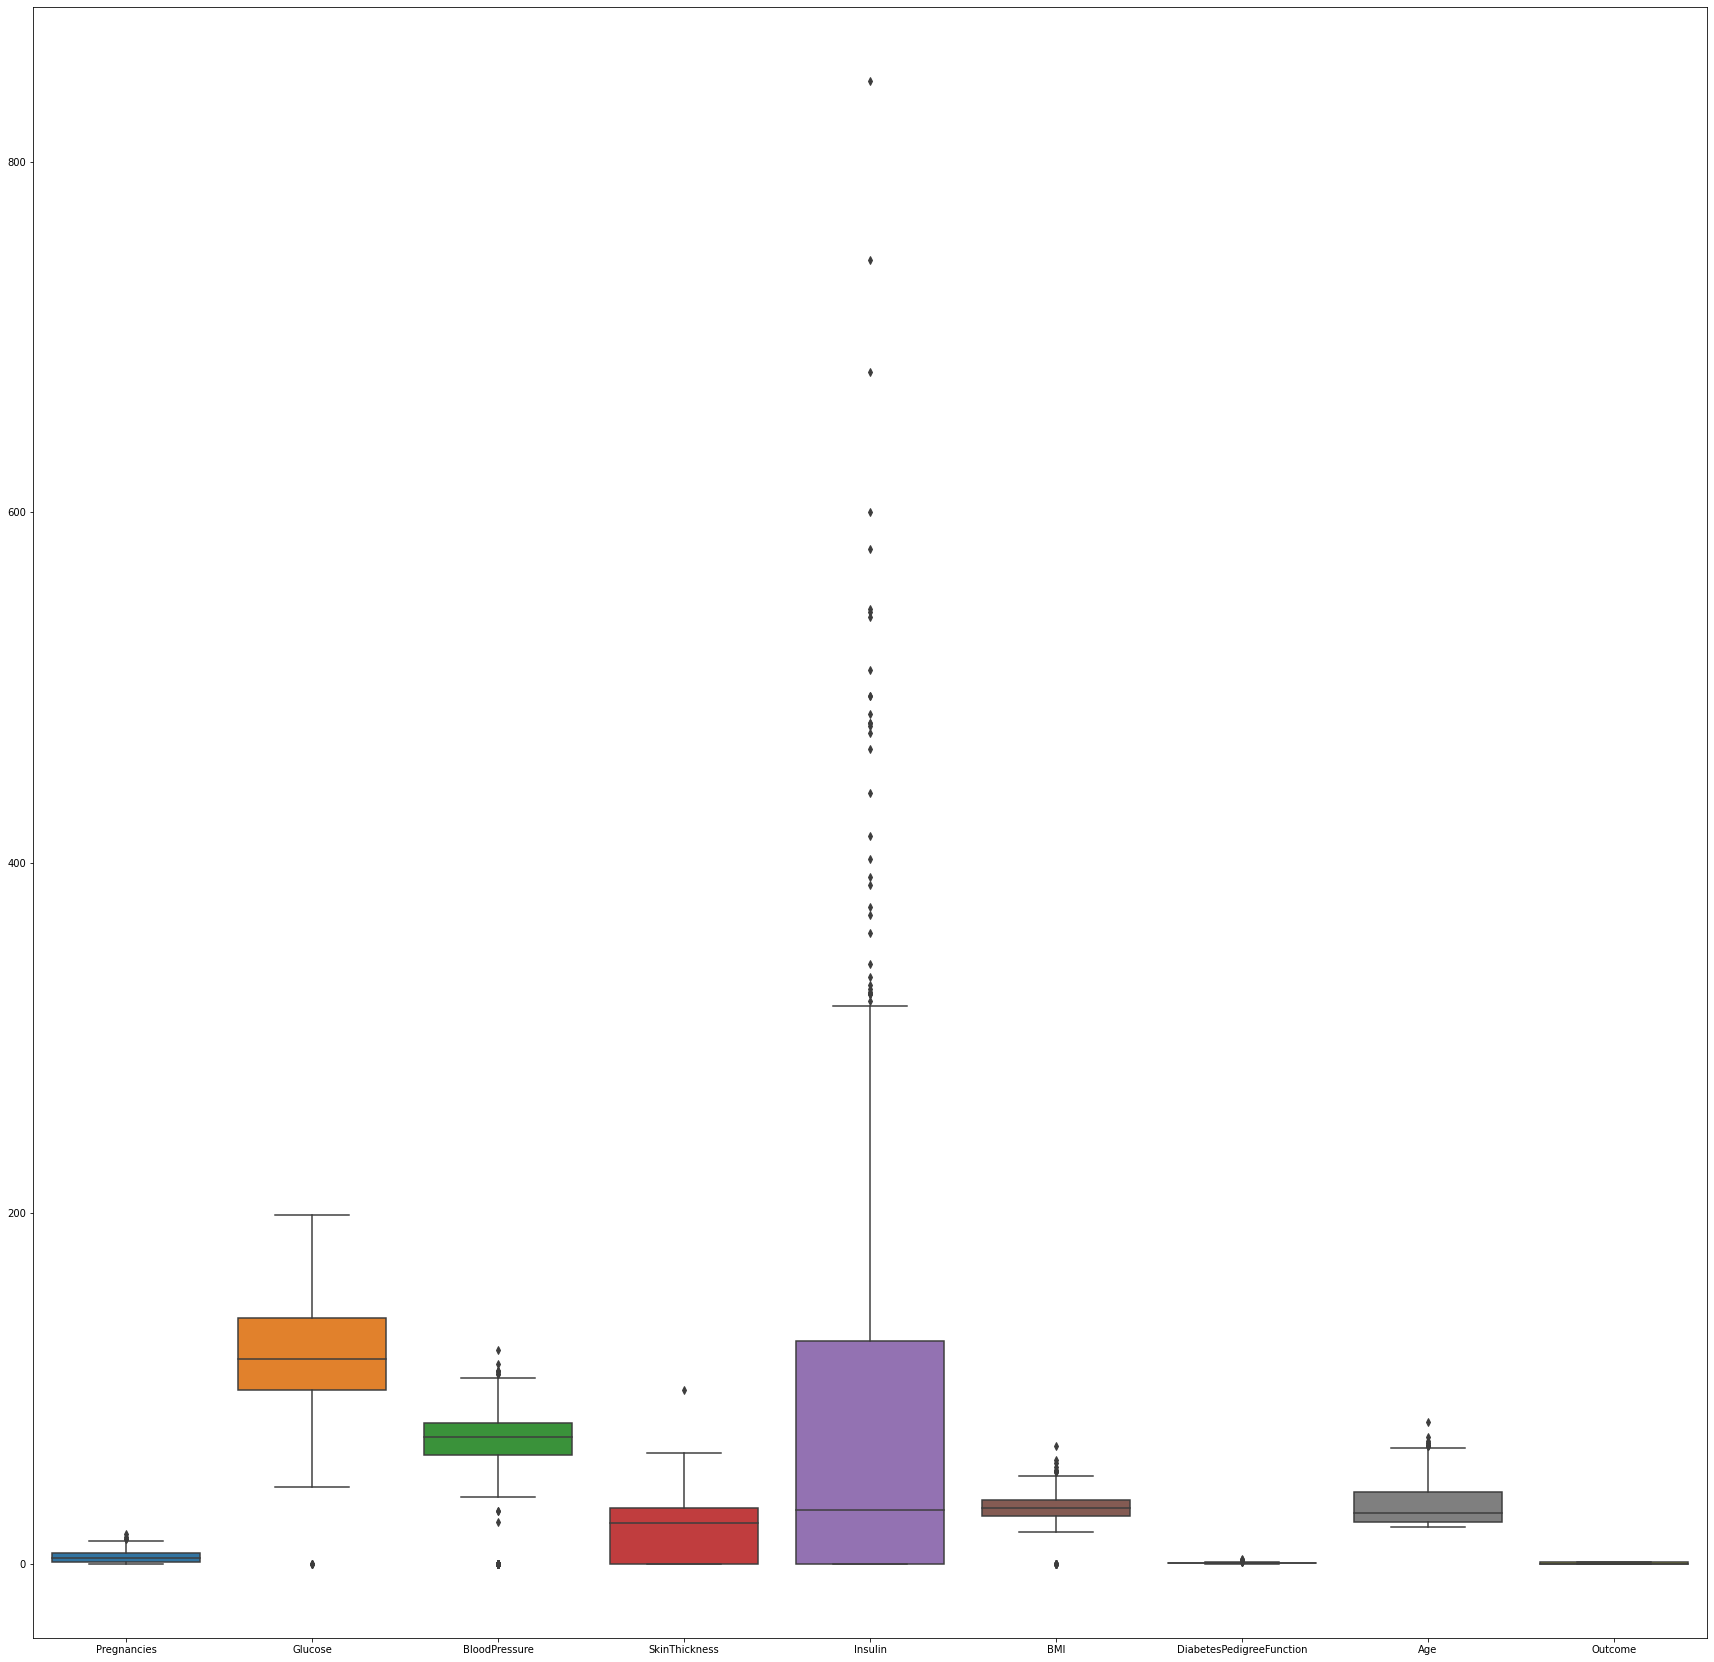

In [ ]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df)

In [ ]:
# Handling Outlier
Q1 = (df[df.columns]).quantile(0.25)
Q3 = (df[df.columns]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df > maximum)
lower_than = (df < minimum)

df = df.mask(more_than, maximum, axis=1) #mask ini mengganti data yang di atas outlier menjadi data maximum sehingga datanya tidak hilang
df = df.mask(lower_than, minimum, axis=1) #mask ini mengganti data yang di bawah outlier menjadi data minimum sehingga datanya tidak hilang

print('\nPersebaran data setelah ditangani Outlier: ')
print(df[df.columns].describe())

Nilai Maximum dari masing-masing Variable adalah: 
Pregnancies                  13.500
Glucose                     202.125
BloodPressure               107.000
SkinThickness                80.000
Insulin                     318.125
BMI                          50.550
DiabetesPedigreeFunction      1.200
Age                          66.500
Outcome                       2.500
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64

Persebaran data setelah ditangani Outlier: 
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.837240  12

Step ini dilakukan untuk menghandle Outlier dengan cara melakukan fungsi mask ke dalam dataset kita. Data di mana lebih dari nilai outlier maka akan diganti menjadi nilai maximum. Sebalikanya Data di mana lebih kecil dari nilai outlier maka akan diganti menjadi nilai minimum.

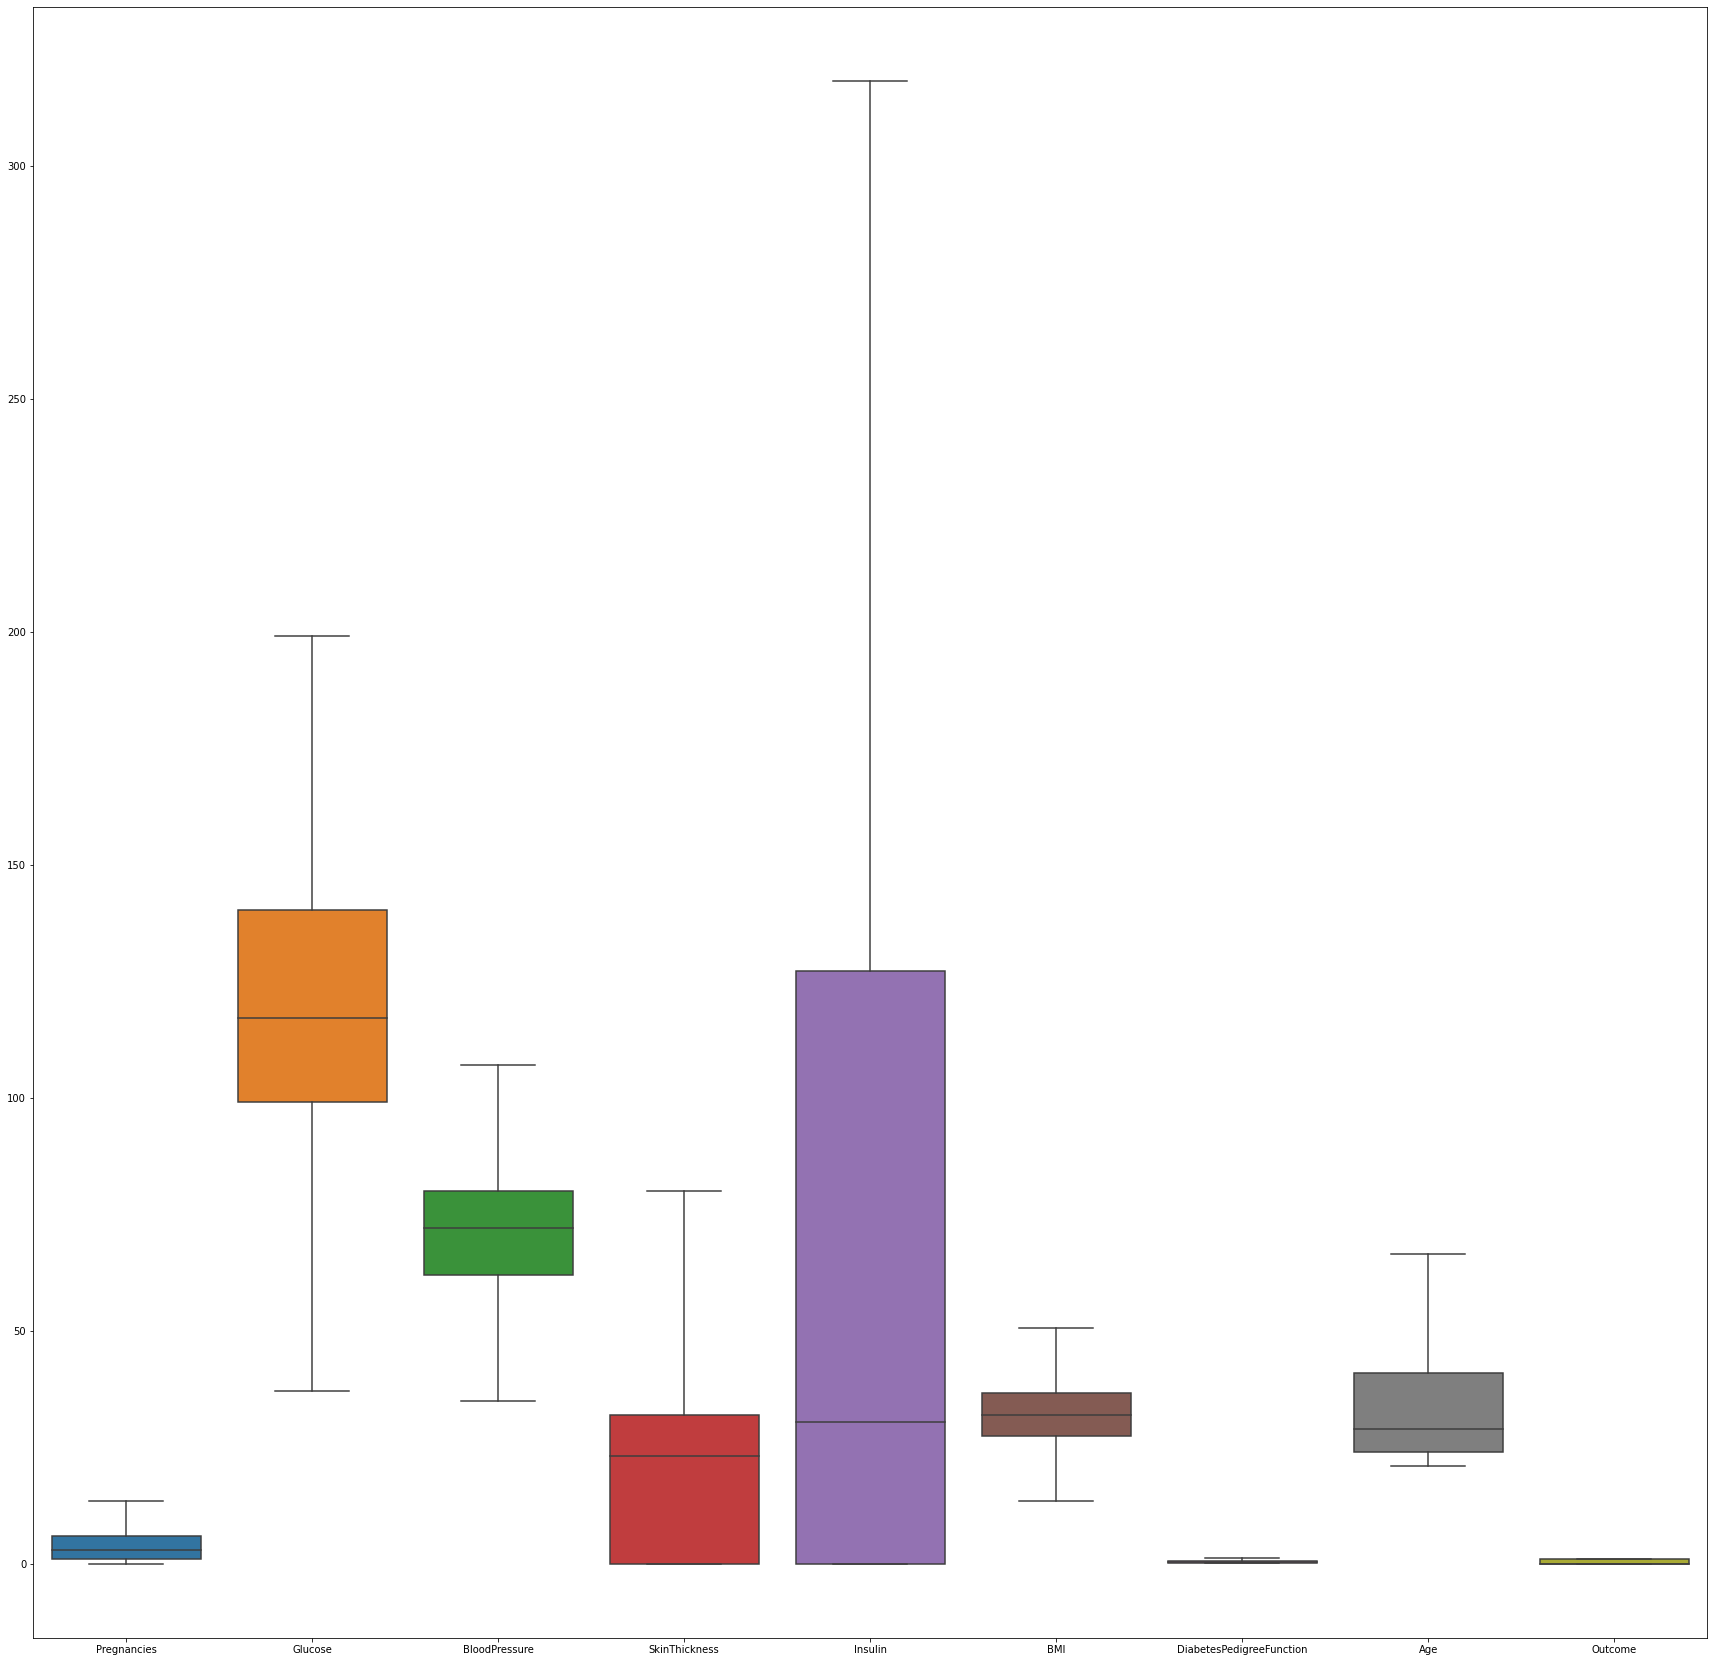

In [ ]:
# Cek kembali outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df)

Setelah kita handling Outlier, dapat dilihat gambar di atas bahwa sudah tidak ada nilai-nilai yang outlier.

##Check Imbalance Data

Selanjutnya kita melihat apakah ada tidaknya imbalance data pada dataset 

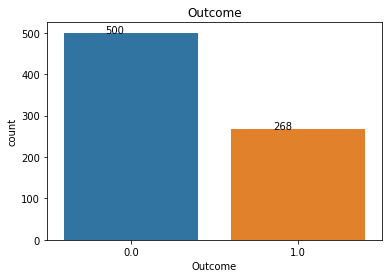

In [ ]:
# # Observe imbalance data here 
# plt.figure(figsize=(8,6))
# sns.countplot(df.Outcome)

ax = sns.countplot(x="Outcome", data=df)
plt.title("Outcome")

for p in ax.patches: #Add data label
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##Creating Correlation Matrix

Langkah terakhir kita melihat correlation matrix untuk melihat korelasi antar feature

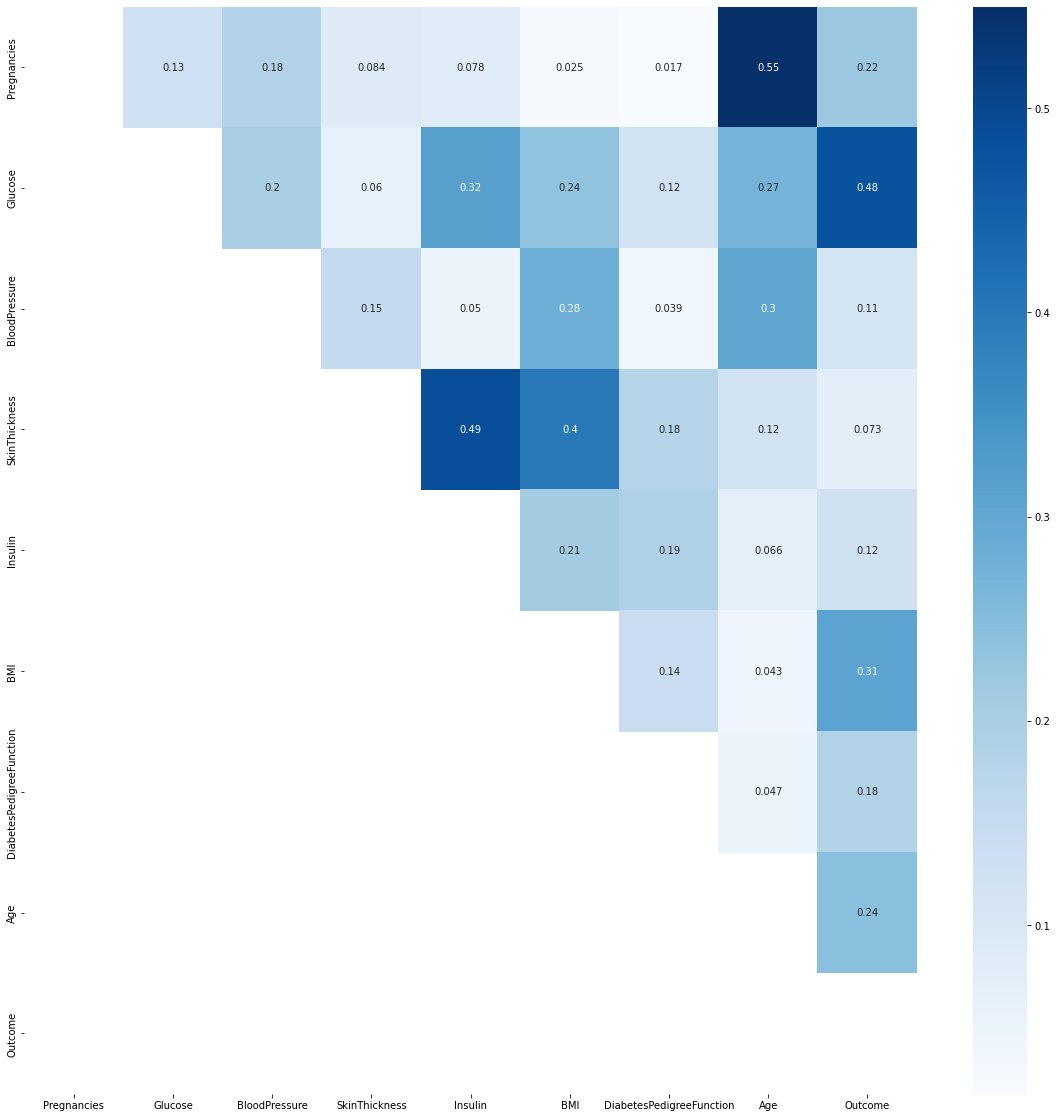

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='Blues')

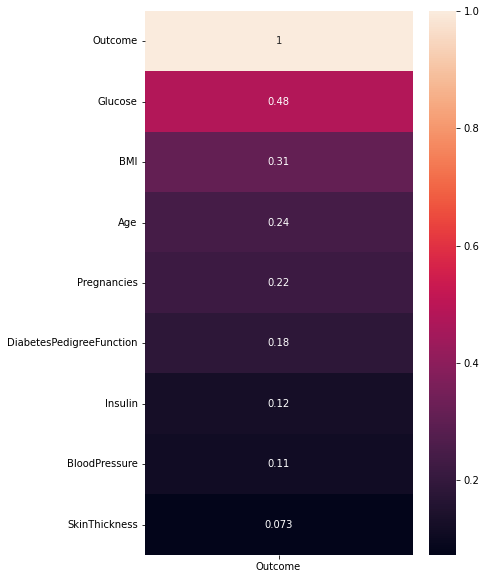

In [ ]:
plt.figure(figsize=(6,10))
sns.heatmap(corr_matrix[['Outcome']].sort_values(by=['Outcome'],ascending=False,),annot=True)

In [ ]:
#Jika ada data berkorelasi tinggi, maka drop salah satu kolom,
#misal Pregnancies dan Age berkorelasi tinggi maka salah satu didrop

#Machine Learning Model

Sekarang kita masuk ke dalam pemodelan machine learning

## Split X and Y Variable

Kita harus memisahkan mana data X yang merupakan Feature dan juga Y yang merupakan target

In [ ]:
# Memisahkan mana X dan mana y
y= df['Outcome']
X= df.drop(['Outcome'],1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

##Creating Model

Selanjutnya adalah kita mencoba membuat dengan berbagai macam model machine learning

In [ ]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [1.0], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.6883116883116883], 1 of KFold 5
DecisionTreeClassifier Recall: [0.5925925925925926], 1 of KFold 5
DecisionTreeClassifier Precission: [0.5517241379310345], 1 of KFold 5
DecisionTreeClassifier AUC: [0.6662962962962963], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [1.0], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.6883116883116883], 2 of KFold 5
DecisionTreeClassifier Recall: [0.5925925925925926], 2 of KFold 5
DecisionTreeClassifier Precission: [0.5517241379310345], 2 of KFold 5
DecisionTreeClassifier AUC: [0.66

##Compare and pick the best model

Setelah dibuat model kemudia kita melakukan evaluasi model mana yang terbaik

In [ ]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
1,LogisticRegression,0.778318,0.778635,0.739608,0.567365,0.729683,0.000317
9,XGBClassifier,0.888344,0.766887,0.690215,0.608316,0.730158,0.121457
6,RandomForestClassifier,1.000000,0.766853,0.693999,0.600629,0.728314,0.233147
7,GradientBoostingClassifier,0.922201,0.763000,0.679805,0.615933,0.728966,0.159201
4,SVC,0.768880,0.760368,0.738830,0.488819,0.697410,0.008511
8,ExtraTreesClassifier,1.000000,0.756532,0.685554,0.559748,0.710874,0.243468
3,GaussianNB,0.764644,0.755165,0.662043,0.619217,0.723609,0.009479
2,KNeighborsClassifier,0.805013,0.697869,0.577913,0.503634,0.652817,0.107143
0,DecisionTreeClassifier,1.000000,0.686096,0.555131,0.578197,0.661099,0.313904
5,LinearSVC,0.662109,0.684933,0.492273,0.350734,0.607367,0.022825


##Grid Search

Ketika model yang terbaik dipilih maka selanjutnya adalah melakukan grid search untuk mencari hyperparameter terbaik

In [ ]:
#Grid Search
model = LogisticRegression(max_iter = 4000)

param = dict()
param['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
param['C'] = [0.00001, 0.0001, 0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20, 100]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)


##Pick the best hyperparameter

In [ ]:
clf1 = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = True)
clf1.fit(X,y)

Fitting 50 folds for each of 240 candidates, totalling 12000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=1),
             estimator=LogisticRegression(max_iter=4000), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.003, 0.005, 0.01, 0.03,
                               0.05, 0.1, 0.3, 0.5, 1, 2, 3, 3, 4, 5, 10, 20,
                               100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=True)

In [ ]:
print('Best Score: {}'.format(clf1.best_score_))
print('Best Hyperparameters: {}'.format(clf1.best_params_))

Best Score: 0.7704261098378745
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# clf2 = GridSearchCV(model,param,  scoring='recall', n_jobs=-1, cv=cv, verbose = True)
# clf2.fit(X,y)

In [ ]:
# print('Best Score: {}'.format(clf2.best_score_))
# print('Best Hyperparameters: {}'.format(clf2.best_params_))

##Split Train and Testing Dataset

Di sini kita membagi data train dan testing 

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)


X_train dataset shape:  (614, 8)
y_train dataset shape:  (614,)
X_test dataset shape:  (154, 8)
y_test dataset shape:  (154,)


##Practice Model

Kita melatih model machine learning yang telah kita buat

In [ ]:
# Melatih Model
model = LogisticRegression(**clf1.best_params_).fit(X_train,y_train)

In [ ]:
# Test Model
y_pred_train=model.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       401
         1.0       0.73      0.58      0.64       213

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614



#Confusion Matrix

Hasil akhirnya kita melihat confusion matrix yang terbentuk

Confusion Matrix: [[355  90]
 [ 46 123]]


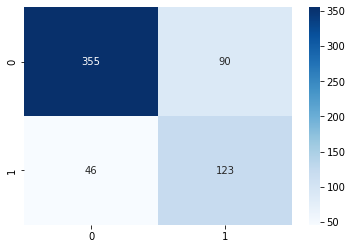

In [ ]:
cm_train = confusion_matrix(y_pred_train, y_train)
print('Confusion Matrix: {}'.format(cm_train))
## visualisasi
sns.heatmap(cm_train, annot=True, fmt='d', cmap="Blues")